My business suggestion is in question 6, (4). There is more explain in the following markdowns between codes.  

Please know that.        Thanks!

Lifeng Liu

In addition, complete the following:   
1 Conduct exploratory analysis on the provided dataset.   
State your hypothesis based on the insights from your exploration.   
    
First I do the data cleaning to check if there is any null values. Then I make plots to see the distribution for each columns.   
   
   In the context of AB testing experiments, statistical significance is how likely it is that the difference between your experiment's control version and test version isn't due to error or random chance. For example, if I run a test with a 95% significance level, I can be 95% confident that the differences are real.      
      
Second I believe there are some columns that are highly corralted with converted_Fri. So I did A/B testing for each feature.   
If the P value is less than 0.05. It means the column is statistical significance with converted_Fri.  
Then I find that: 
visitor_location, merketing_channel,  gender,       
product_views_Thu,   product_views_Fri,    
time_on_site_Mon, pages_visited_Mon     
Those 7 num columns are significant with converted_Fri.    

2 Prepare your data for modelling (i.e., data cleaning and feature engineering).   
  From A/B testing, I select 7 columns that are statistical significance with converted_Fri.    
  I am going to do OLS regression, KNN and Naive Bayes to build models.  

3 Build a model to predict the output variable. Hint: you will need to try several models to find the best model for your problem.    
I tried OLS regressions model, but the R2 is not high.  
   Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable.   

The coefficient of determination, which indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R-squared value of 0.242 suggests that about 24.2% of the variation in the dependent variable is explained by the independent variables in the model.  

KNN is one of the simplest forms of machine learning algorithms mostly used for classification. It classifies the data point on how its neighbor is classified. KNN classifies the new data points based on the similarity measure of the earlier stored data points.  
And similar with Naive Bayes.     
Here in KNN I get higher accrancy which is 76.25%.     

4 Evaluate each model using the evaluation techniques you have learned in class.    
  The OLS model has only 24% R square with MSE = 0.177  . MSE is small but the R2 is very low. It is not a good model.   
  The KNN model shows higher Accrancy than Naive Bayes which is 76.25%.    
 

5 Select and optimize your final model.    
    I believe KNN is the best model in my analysis. It has a high accrancy 76.25% with low error.   
  I use F1 score to conduct the result because the Y value is binary. F1 SCORE IS BEST FOR BINARY.   

6 Explain your model to a business executive. Your explanation should include the following:   

1) Your data exploration findings, initial hypothesis, and whether the hypothesis proved true.    
Initial Hypothesis:   
There is no significant relationship between visitor location, marketing channel, gender, product views on Thursday (product_views_Thu), product views on Friday (product_views_Fri), time spent on the site on Monday (time_on_site_Mon), pages visited on Monday (pages_visited_Mon), and the likelihood of conversion on Friday (converted_Fri).   

Alternative Hypothesis:
There is a significant relationship between at least one of the following factors: visitor location, marketing channel, gender, product views on Thursday (product_views_Thu), product views on Friday (product_views_Fri), time spent on the site on Monday (time_on_site_Mon), pages visited on Monday (pages_visited_Mon), and the likelihood of conversion on Friday (converted_Fri).   

In other words, the null hypothesis suggests that these factors do not impact the likelihood of conversion on Friday, while the alternative hypothesis suggests that at least one of these factors does have a significant impact on conversion rates.   

2) Your approach for building and evaluating the model.    
I used A/B testing, OLS regression, KNN and Naive Bayes.   
Use R square, MSE, accrancy, Precision, Recall, F1 Score to evaluate the model.   

3) The final model you selected and how you know this is the best model for the problem.  
I select KNN. It shows high accrancy, good Practicality in real life.  

4) How the model should be used by the business, in business process.    
By sorting 7 features, I suggest the company to do these to improve the rate of convertion on Friday. 
Frist customers from google, organic and youtube are more likely to convert on Friday.   
Second customers from South America are more likelt to convert on Friday.  
Third female customers are much more likely to conver on Friday than males customers.  
So the target customers should be South America females get information from google, organic and youtube.   
They are more likely to pay attention on Thursday and Friday. Spend more time on Monday.   
At those time points, I suggest the company release more coupons for target clients.   

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv(r"D:\5.MBAN6110 Data Science I\conversion_data.csv")


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [28]:
df.isnull().sum(axis=1).sum()


0

Check outliers

In [30]:
df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


Check distribution and outliers if any.     

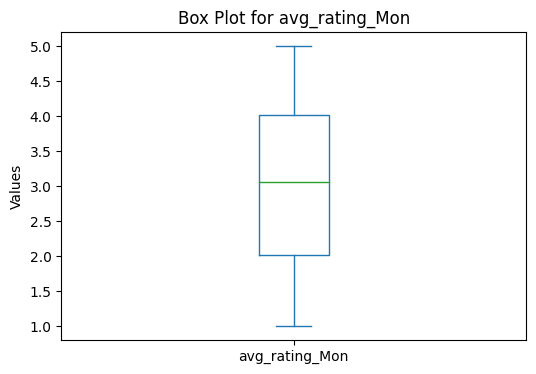

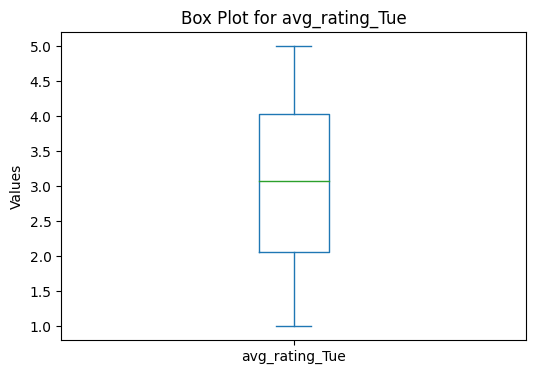

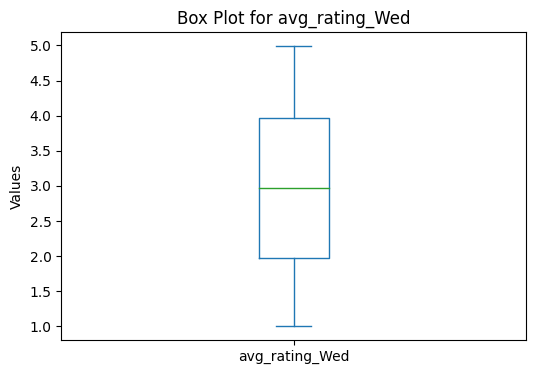

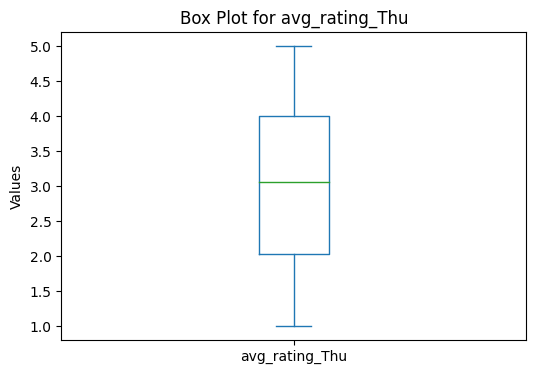

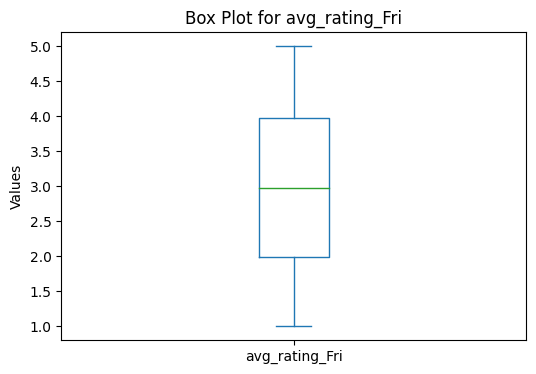

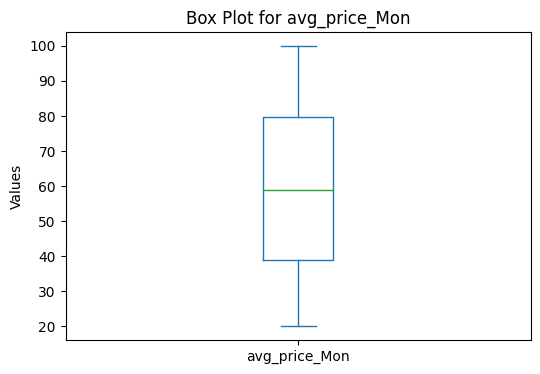

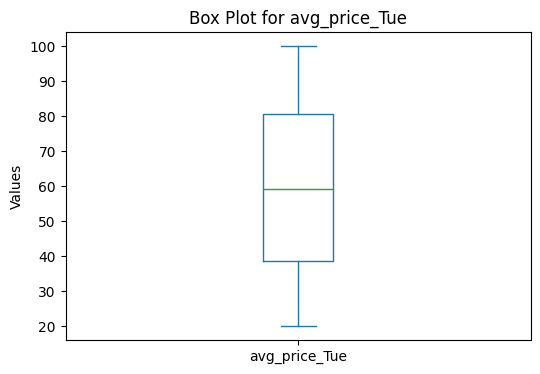

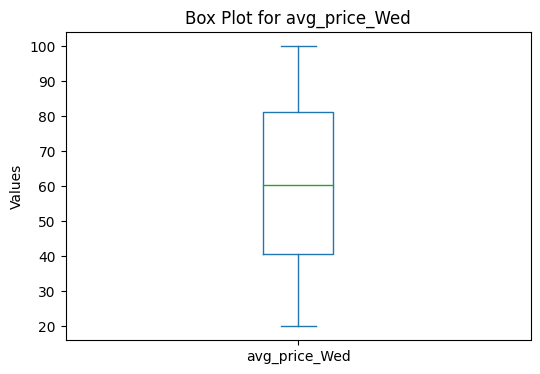

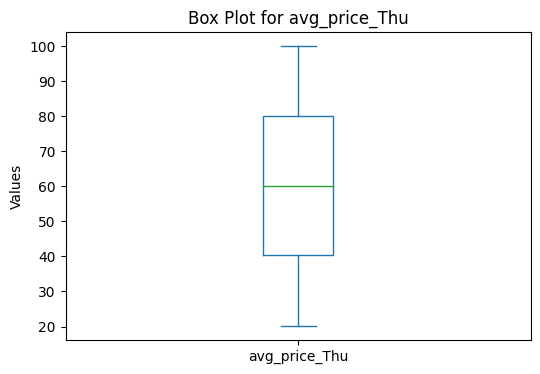

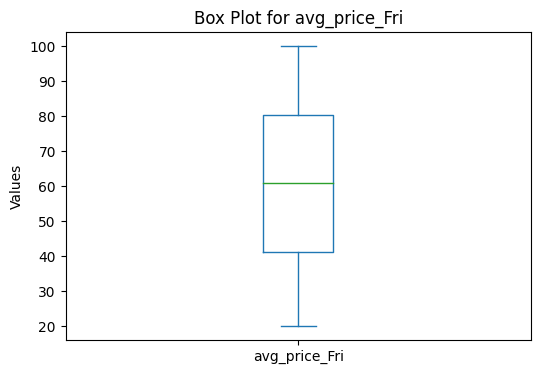

In [29]:
import matplotlib.pyplot as plt

# Iterate over columns
for column in df.columns:
    # Skip non-numeric columns
    if not df[column].dtype in [float, int]:
        continue
    
    # Create a box plot
    plt.figure(figsize=(6, 4))
    df[column].plot.box()
    
    # Set the title and labels
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    
    # Show the plot
    plt.show()

In [31]:
df = df.drop(columns=['Unnamed: 0'])

In [32]:
df.describe()

,visitor_id,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,avg_rating_Wed,avg_rating_Thu,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2.541500,2.440500,2.441000,2.256500,2.354000,3.023990,3.042760,2.970885,3.026555,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,1.704914,1.715206,2.343345,2.370974,2.335682,1.151037,1.154019,1.148805,1.139744,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,1.000000,0.000000,0.000000,0.000000,-4.000000,-3.000000,1.000000,1.000000,1.000000,1.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,500.750000,1.000000,1.000000,0.000000,0.000000,0.000000,2.017500,2.057500,1.970000,2.030000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,1000.500000,3.000000,2.000000,2.000000,2.000000,2.000000,3.055000,3.080000,2.965000,3.060000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1500.250000,4.000000,4.000000,4.000000,5.000000,5.000000,4.022500,4.030000,3.960000,4.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000
max,2000.000000,5.000000,5.000000,9.000000,8.000000,8.000000,5.000000,5.000000,4.990000,5.000000,...,60.000000,60.000000,60.000000,60.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000


In [33]:
df.head(10)

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,1,North America,youtube,M,4,5,2,1,2,3.90,...,33,23,46,57,4,5,5,4,6,1
1,2,South America,organic,F,2,5,0,1,5,1.31,...,28,39,24,51,5,6,7,6,2,0
2,3,Australia,instagram,M,3,4,0,-3,5,3.26,...,34,22,34,31,1,3,3,2,3,1
3,4,North America,facebook,M,1,0,0,5,0,2.66,...,26,43,22,39,3,4,7,7,1,0
4,5,Asia,instagram,F,1,5,2,2,3,2.76,...,54,30,47,57,6,6,5,2,4,1
5,6,South America,organic,M,2,2,1,1,0,2.80,...,45,29,20,56,5,2,4,5,5,0
6,7,North America,instagram,M,1,1,0,5,5,3.32,...,53,55,33,45,1,3,5,7,3,1
7,8,Australia,youtube,F,2,1,6,0,0,3.25,...,39,22,33,55,2,1,3,5,4,0
8,9,Europe,youtube,M,4,2,0,0,3,2.12,...,41,42,39,36,4,3,4,7,1,0
9,10,Asia,organic,M,3,1,0,0,0,2.10,...,31,37,40,44,1,3,6,3,7,0


For mean of marketing channel converted_Fri.   
Asia 0.374  
Australia   0.334      
Europe   0.386       
North America   0.351       
South America  0.411         
There is noticable differnece between difference channels.    
Customers in South America has higher rate of convertion.  

In [36]:
df_test = df.copy()
df_test.groupby('visitor_location').describe()

visitor_id                                                \
                      count         mean         std  min     25%     50%   
visitor_location                                                            
Asia                  369.0  1003.024390  563.382083  5.0  520.00  1008.0   
Australia             403.0   953.774194  568.569678  3.0  462.50   935.0   
Europe                383.0  1016.830287  593.039270  9.0  498.00   989.0   
North America         412.0  1007.572816  568.874863  1.0  508.25  1067.0   
South America         433.0  1020.662818  591.945233  2.0  506.00  1031.0   

                                  product_views_Mon            ...  \
                      75%     max             count      mean  ...   
visitor_location                                               ...   
Asia              1497.00  1998.0             369.0  2.655827  ...   
Australia         1413.50  1994.0             403.0  2.503722  ...   
Europe            1581.50  1996.0             383.0  2.498695  ...   
North America     1472.75  2000.0             412.0  2.516990  ...   
South America     1532.00  1999.0             433.0  2.540416  ...   

                 pages_visited_Fri      converted_Fri                      \
                               75%  max         count      mean       std   
visitor_location                                                            
Asia                           6.0  7.0         369.0  0.373984  0.484516   
Australia                      6.0  7.0         403.0  0.334988  0.472573   
Europe                         6.0  7.0         383.0  0.386423  0.487566   
North America                  6.0  7.0         412.0  0.351942  0.478157   
South America                  6.0  7.0         433.0  0.411085  0.492600   

                                           
                  min  25%  50%  75%  max  
visitor_location                           
Asia              0.0  0.0  0.0  1.0  1.0  
Australia         0.0  0.0  0.0  1.0  1.0  
Europe            0.0  0.0  0.0  1.0  1.0  
North America     0.0  0.0  0.0  1.0  1.0  
South America     0.0  0.0  0.0  1.0  1.0  

[5 rows x 216 columns]

For mean of marketing channel converted_Fri.   
facebook 0.395   
google   0.493    
instagram   0.491    
organic   0.425    
youtube  0.493    
There is noticable differnece between difference channels.   
Customers from google, instagram, youtube are more likely to convert on Friday. 

In [37]:
df_test1 = df.copy()
df_test1.groupby('marketing_channel').describe()

visitor_id                                                \
                       count         mean         std   min    25%     50%   
marketing_channel                                                            
facebook               394.0   948.065990  581.374826   4.0  419.0   919.5   
google                 399.0  1049.005013  596.977555  12.0  517.5  1076.0   
instagram              431.0  1007.410673  589.018183   3.0  472.0  1014.0   
organic                407.0   984.565111  563.831692   2.0  504.5  1013.0   
youtube                369.0  1013.542005  550.518204   1.0  592.0   982.0   

                                   product_views_Mon            ...  \
                       75%     max             count      mean  ...   
marketing_channel                                               ...   
facebook           1421.25  1998.0             394.0  2.558376  ...   
google             1590.00  1997.0             399.0  2.498747  ...   
instagram          1539.50  2000.0             431.0  2.482599  ...   
organic            1440.00  1996.0             407.0  2.692875  ...   
youtube            1483.00  1999.0             369.0  2.471545  ...   

                  pages_visited_Fri      converted_Fri                      \
                                75%  max         count      mean       std   
marketing_channel                                                            
facebook                        6.0  7.0         394.0  0.395939  0.489673   
google                          6.0  7.0         399.0  0.413534  0.493085   
instagram                       6.0  7.0         431.0  0.403712  0.491211   
organic                         6.0  7.0         407.0  0.235872  0.425065   
youtube                         6.0  7.0         369.0  0.414634  0.493328   

                                            
                   min  25%  50%  75%  max  
marketing_channel                           
facebook           0.0  0.0  0.0  1.0  1.0  
google             0.0  0.0  0.0  1.0  1.0  
instagram          0.0  0.0  0.0  1.0  1.0  
organic            0.0  0.0  0.0  0.0  1.0  
youtube            0.0  0.0  0.0  1.0  1.0  

[5 rows x 216 columns]

For female, the mean converted_Fri is 0.45.   
For male, the mean converted_Fri is 0.27.   
Female customers are more likely to convert on Friday.   
It seems gender is high correlated with convertion.

In [68]:
df_test2 = df.copy()
df_test2.groupby('gender').describe()

visitor_id                                                       \
            count         mean         std  min    25%     50%     75%   
gender                                                                   
F          1093.0  1009.690759  572.184039  2.0  523.0  1022.0  1491.0   
M           907.0   989.424476  583.953980  1.0  470.5   987.0  1516.0   

               product_views_Mon            ... pages_visited_Fri       \
           max             count      mean  ...               75%  max   
gender                                      ...                          
F       2000.0            1093.0  2.563586  ...               6.0  7.0   
M       1998.0             907.0  2.514884  ...               6.0  7.0   

       converted_Fri                                               
               count      mean       std  min  25%  50%  75%  max  
gender                                                             
F             1093.0  0.449222  0.497643  0.0  0.0  0.0  1.0  1.0  
M              907.0  0.278942  0.448726  0.0  0.0  0.0  1.0  1.0  

[2 rows x 216 columns]

In [38]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

In [40]:
df['visitor_location'].unique()

array(['North America', 'South America', 'Australia', 'Asia', 'Europe'],
      dtype=object)

Group by num columns. See how they influence convertion rate on Friday.   

In [39]:
df.groupby('converted_Fri')[['product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri']].median()

,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,avg_rating_Wed,avg_rating_Thu,avg_rating_Fri,...,time_on_site_Mon,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri
converted_Fri,,,,,,,,,,,,,,,,,,,,,
0,3.0,2.0,2.0,1.0,0.0,3.00,3.090,3.000,3.135,2.980,...,40.0,39.0,40.0,40.5,40.0,4.0,4.0,4.0,4.0,4.0
1,2.0,2.0,2.0,4.0,5.0,3.16,3.045,2.865,2.950,2.975,...,39.0,40.0,40.0,40.5,41.0,4.0,4.0,4.0,4.0,4.0


USE A/B testing to check each column if it is significant related with converted_Fri.    

There are so many columns.   
Then I delate results with P value > 0.05, means not significant to converted_Fri.  
So I will only keep code with P value < 0.05

Overall, from A/B testing. It is obvious that: 
visitor_location, merketing_channel,  gender,       
product_views_Thu,   product_views_Fri,    
time_on_site_Mon, pages_visited_Mon     
Those 7 num columns are significant with converted_Fri

In [109]:
# Dont no why it shows none. I think the P value may be zero.   
#   But I believe conerted_Fri is related with location

from scipy import stats

location_1 = df[df['visitor_location'] == 'Sorth America']['converted_Fri']
location_2 = df[df['visitor_location'] == 'Nouth America']['converted_Fri']
location_3 = df[df['visitor_location'] == 'Europe']['converted_Fri']
location_4 = df[df['visitor_location'] == 'Asia']['converted_Fri']
location_5 = df[df['visitor_location'] == 'Australia']['converted_Fri']

f_value, p_value = stats.f_oneway(location_1, location_2, location_3, location_4, location_5)

print("F-value: ", f_value)
print("p-value: ", p_value)

F-value:  nan
p-value:  nan


C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [108]:
# check by channel  

ch_1 = df[df['marketing_channel'] == 'facebook']['converted_Fri']
ch_2 = df[df['marketing_channel'] == 'google']['converted_Fri']
ch_3 = df[df['marketing_channel'] == 'instagram']['converted_Fri']
ch_4 = df[df['marketing_channel'] == 'organic']['converted_Fri']
ch_5 = df[df['marketing_channel'] == 'youtube']['converted_Fri']

f_value, p_value = stats.f_oneway(ch_1, ch_2, ch_3, ch_4, ch_5)

print("F-value: ", f_value)
print("p-value: ", p_value)

F-value:  10.418360738207543
p-value:  2.3690267963428732e-08


In [110]:
# Check by gender
gen_1 = df[df['gender'] == 'F']['converted_Fri']
gen_2 = df[df['gender'] == 'M']['converted_Fri']


f_value, p_value = stats.f_oneway(gen_1, gen_2)

print("F-value: ", f_value)
print("p-value: ", p_value)

F-value:  63.410399246229176
p-value:  2.7898989167708575e-15


product_views_Thu shows statistical significant with converted_Fri

In [48]:
var1 = df[df['converted_Fri']== 1]['product_views_Thu']
control = df[df['converted_Fri']== 0]['product_views_Thu']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=12.413918978172775, pvalue=3.8508583651223237e-34)


product_views_Fri shows statistical significant

In [49]:
var1 = df[df['converted_Fri']== 1]['product_views_Fri']
control = df[df['converted_Fri']== 0]['product_views_Fri']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=18.964264506452515, pvalue=7.046202858151929e-74)


'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri'

In [57]:
var1 = df[df['converted_Fri']== 1]['time_on_site_Mon']
control = df[df['converted_Fri']== 0]['time_on_site_Mon']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-1.9777392733737247, pvalue=0.04809533998617163)


In [62]:
var1 = df[df['converted_Fri']== 1]['pages_visited_Mon']
control = df[df['converted_Fri']== 0]['pages_visited_Mon']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-2.2076596620500495, pvalue=0.027381258721143144)


Data Visualization and  Modelling

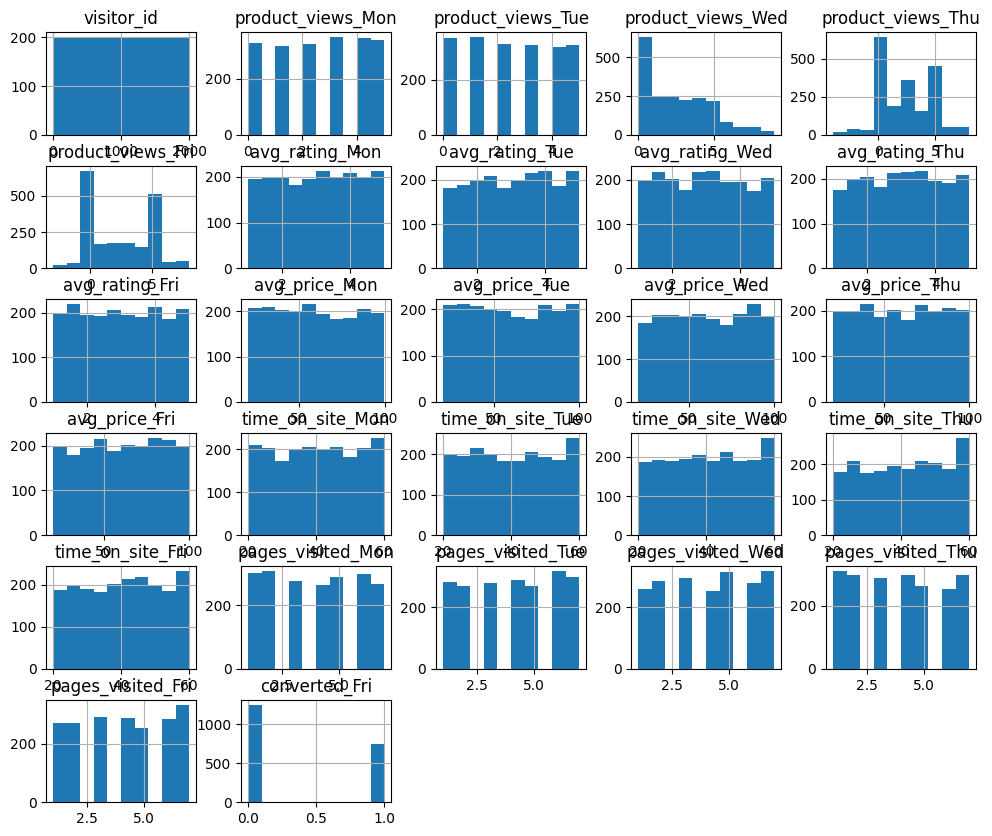

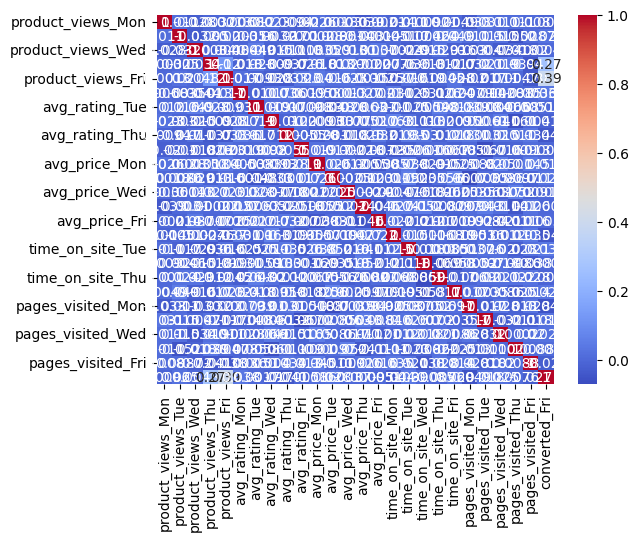

In [70]:
# Histograms
df.hist(figsize=(12, 10)) # we can quickly create all histograms at once 
plt.show()

# Correlation matrix heatmap
new_t = df[[
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri']]
corr_matrix = new_t.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable.   

The coefficient of determination, which indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R-squared value of 0.242 suggests that about 24.2% of the variation in the dependent variable is explained by the independent variables in the model.  

It is not a good regression model.   
Because the variables should better be continuous numeric values.  
This data is not.   
So I would like to explore more ways.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [77]:
olsresults = ols("converted_Fri ~ visitor_location + marketing_channel + gender + product_views_Thu + product_views_Fri + time_on_site_Mon + pages_visited_Mon", data=df).fit()
print(olsresults.summary())

                            OLS Regression Results                            
Dep. Variable:          converted_Fri   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     48.64
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.72e-109
Time:                        19:51:38   Log-Likelihood:                -1107.4
No. Observations:                2000   AIC:                             2243.
Df Residuals:                    1986   BIC:                             2321.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [78]:
residuals = olsresults.resid
mse = np.mean(np.square(residuals))
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.1771951827830439


Build Naive KNN and Naive Bayes model.  

In [83]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

In [85]:
cat_columns = ['visitor_location', 'marketing_channel', 'gender']
num_columns = ['product_views_Thu','product_views_Fri', 'time_on_site_Mon', 'pages_visited_Mon']
target = 'converted_Fri' 

In [87]:
# build pipeline
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [89]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)

In [91]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [93]:
x_train_transformed.shape

(1600, 16)

In [95]:
x_test_transformed.shape

(400, 16)

In [97]:
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns))
all_feat = num_columns + encoded_columns

X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

In [99]:
accuracies = []

for a in range(3,60):
        
    knn = KNeighborsClassifier(n_neighbors = a)
    knn.fit(X_train_transformed, y_train)
    y_pred = knn.predict(X_test_transformed)
    accuracies.append(accuracy_score(y_pred, y_test))

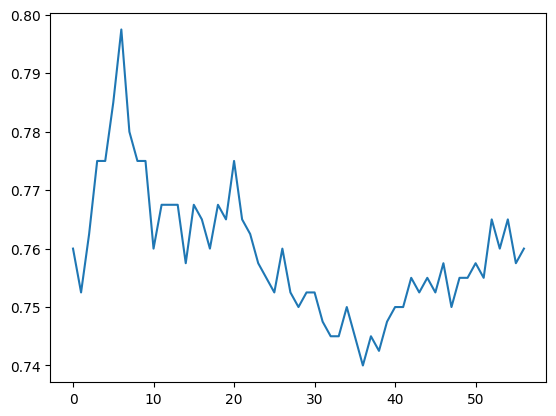

In [100]:
plt.plot(accuracies)

f1 score is best for binary output model.    
Because 0 means no ,1 means yes.    

From 0 to 10 section, the performance is the best.   
So set the range from 1 to 9. 

In [102]:
# Hyperparameter tuning
# select parameters
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
params_knn = {'n_neighbors': list(range(1,9)), 'weights': ['uniform', 'distance']}

# Define the models
nb = GaussianNB()
knn = KNeighborsClassifier()

# Define GridSearchCV
gridsearch_nb = GridSearchCV(nb, params_nb, cv=5, scoring='f1')
    #nb, params_nb, cv=5)
gridsearch_knn = GridSearchCV(knn, params_knn, cv=10, scoring='f1')

# Fit models
gridsearch_nb.fit(X_train_transformed, y_train)
gridsearch_knn.fit(X_train_transformed, y_train)

# Get the best parameters
print("Best parameters for Naive Bayes: ", gridsearch_nb.best_params_)
print("Best parameters for KNN: ", gridsearch_knn.best_params_)

Best parameters for Naive Bayes:  {'var_smoothing': 0.02848035868435802}
Best parameters for KNN:  {'n_neighbors': 5, 'weights': 'uniform'}


In [103]:
# Apply the best parameters
nb_best = GaussianNB(**gridsearch_nb.best_params_)
knn_best = KNeighborsClassifier(**gridsearch_knn.best_params_)

# Perform cross-validation
cv_scores_nb = cross_val_score(nb_best, X_train_transformed, y_train, cv=5, scoring='f1')
cv_scores_knn = cross_val_score(knn_best, X_train_transformed, y_train, cv=5, scoring='f1')

print("Cross-validation scores for Naive Bayes: ", cv_scores_nb)
print("Cross-validation scores for KNN: ", cv_scores_knn)

# Fit the models with the best parameters
nb_best.fit(X_train_transformed, y_train)
knn_best.fit(X_train_transformed, y_train)

# Evaluate on the test set
y_pred_nb = nb_best.predict(X_test_transformed)
y_pred_knn = knn_best.predict(X_test_transformed)

print("Test accuracy for Naive Bayes: ", accuracy_score(y_test, y_pred_nb))
print("Test accuracy for KNN: ", accuracy_score(y_test, y_pred_knn))

Cross-validation scores for Naive Bayes:  [0.62385321 0.64628821 0.67264574 0.64912281 0.64888889]
Cross-validation scores for KNN:  [0.67567568 0.66666667 0.63302752 0.66363636 0.68778281]
Test accuracy for Naive Bayes:  0.7325
Test accuracy for KNN:  0.7625


Use the model to predict how many customers may converted on Friday.   
Because 0 means no. 1 means yes.   
So the sum of 1 means the number of convert customers.

In 400 customers, there may be 144 people will make a purchase within a month.   
144 is the number with error. Because the KNN accurany is not 100%.   
So the real number of buyers may be a little bit less than 144.  

In [104]:
total_test = len(y_pred_knn)
convert = sum(y_pred_knn)
print(total_test, convert)

400 144


KNN model has higher accuracy(0.7625) than Naive Bayes Metrics.  

TP + FP = 104 + 42 = 144.   
So the error is around 42.   
A confusion matrix is a table that is used to evaluate the performance of a classification algorithm by showing the count of true positive, true negative, false positive, and false negative predictions.   

True Positives (TP): This is the count of instances that were correctly classified as the positive class by the model. In the case, there are 102 instances that were actually positive and were correctly classified as positive.      

True Negatives (TN): This is the count of instances that were correctly classified as the negative class by the model. In the case, there are 203 instances that were actually negative and were correctly classified as negative.     

False Positives (FP): This is the count of instances that were incorrectly classified as the positive class by the model when they were actually negative. In the case, there are 42 instances that were actually negative but were incorrectly classified as positive.    

False Negatives (FN): This is the count of instances that were incorrectly classified as the negative class by the model when they were actually positive. In the case, there are 53 instances that were actually positive but were incorrectly classified as negative.   

Out of a total of 400 instances evaluated by the KNN classification model:    

203 instances were correctly classified as negative (True Negatives).     
102 instances were correctly classified as positive (True Positives).      
42 instances were incorrectly classified as positive when they were actually negative (False Positives).     
53 instances were incorrectly classified as negative when they were actually positive (False Negatives).     
In summary, the KNN model's performance can be assessed using these values to calculate various metrics like accuracy, precision, recall (sensitivity), and F1-score. These metrics help provide insights into the effectiveness of the model's predictions and its ability to distinguish between the two classes.   



In [105]:
# Compute metrics
print("Naive Bayes Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_nb))
print("Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("Precision: ", precision_score(y_test, y_pred_nb))
print("Recall: ", recall_score(y_test, y_pred_nb))
print("F1 Score: ", f1_score(y_test, y_pred_nb))

print("\nK-Nearest Neighbors Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))

Naive Bayes Metrics: 
Confusion Matrix:  [[196  49]
 [ 58  97]]
Accuracy:  0.7325
Precision:  0.6643835616438356
Recall:  0.6258064516129033
F1 Score:  0.6445182724252493

K-Nearest Neighbors Metrics: 
Confusion Matrix:  [[203  42]
 [ 53 102]]
Accuracy:  0.7625
Precision:  0.7083333333333334
Recall:  0.6580645161290323
F1 Score:  0.6822742474916389
